# Hypothesis Testing in Healthcare: Drug Safety

A pharmaceutical company GlobalXYZ has just completed a randomized controlled drug trial. To promote transparency and reproducibility of the drug's outcome, they (GlobalXYZ) have presented the dataset to your organization, a non-profit that focuses primarily on drug safety.

The dataset provided contained five adverse effects, demographic data, vital signs, etc. Your organization is primarily interested in the drug's adverse reactions. It wants to know if the adverse reactions, if any, are of significant proportions. It has asked you to explore and answer some questions from the data.

The dataset `drug_safety.csv` was obtained from [Hbiostat](https://hbiostat.org/data/) courtesy of the Vanderbilt University Department of Biostatistics. It contained five adverse effects: headache, abdominal pain, dyspepsia, upper respiratory infection, chronic obstructive airway disease (COAD), demographic data, vital signs, lab measures, etc. The ratio of drug observations to placebo observations is 2 to 1.

For this project, the dataset has been modified to reflect the presence and absence of adverse effects `adverse_effects` and the number of adverse effects in a single individual `num_effects`.

The columns in the modified dataset are: 

| Column | Description |
|--------|-------------|
|`sex` | The gender of the individual |
|`age` | The age of the individual |
|`week` | The week of the drug testing |
|`trx` | The treatment (Drug) and control (Placebo) groups | 
|`wbc` | The count of white blood cells |
|`rbc` | The count of red blood cells |
|`adverse_effects` | The presence of at least a single adverse effect |
|`num_effects` | The number of adverse effects experienced by a single individual |

The original dataset can be found [here](https://hbiostat.org/data/repo/safety.rda).

Your organization has asked you to explore and answer some questions from the data collected. See the project instructions.

In [1]:
# Import packages
import numpy as np
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
import pingouin
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Load the dataset
drug_safety = pd.read_csv("drug_safety.csv")

# Start coding here...

C:\Users\AHamdan\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
drug_safety.sample(10)

,age,sex,trx,week,wbc,rbc,adverse_effects,num_effects
7421,50,female,Placebo,0,6.6,4.6,No,0
12143,74,male,Drug,1,NaN,NaN,No,0
6823,73,male,Drug,20,NaN,NaN,No,0
12296,75,male,Drug,4,5.3,4.5,No,0
15351,65,male,Drug,20,NaN,NaN,Yes,1
5460,68,male,Placebo,2,NaN,NaN,No,0
783,66,male,Drug,0,5.2,4.9,No,0
13071,66,male,Drug,2,7.8,5.0,No,0
4363,74,male,Drug,16,NaN,NaN,No,0
12926,57,male,Drug,16,NaN,NaN,No,0


In [3]:
drug_safety.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16103 entries, 0 to 16102
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              16103 non-null  int64  
 1   sex              16103 non-null  object 
 2   trx              16103 non-null  object 
 3   week             16103 non-null  int64  
 4   wbc              9128 non-null   float64
 5   rbc              9127 non-null   float64
 6   adverse_effects  16103 non-null  object 
 7   num_effects      16103 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 1006.6+ KB


## Q-1) Determine if the proportion of adverse effects differs significantly between the Drug and Placebo groups, saving the p-value as a variable called two_sample_p_value.

$H_0$  : Proportion of adverse effectes is the same for Drug and Placebo groups

$H_0$ : P(drug) - P(placebo) = 0

$H_A$  : Proportion of adverse effectes is different for Drug and Placebo groups

$H_A$  : P(drug) - P(placebo) != 0

### Solution A

Caluculate Z score

In [4]:
#get the prpoprtion of deverse effects for each group
prop_hat = drug_safety.groupby('trx')['adverse_effects'].value_counts(normalize = True)
prop_hat

trx      adverse_effects
Drug     No                 0.904540
         Yes                0.095460
Placebo  No                 0.904762
         Yes                0.095238
Name: proportion, dtype: float64

In [5]:
prop_hat_drug = prop_hat[('Drug', 'Yes')]
prop_hat_drug

0.09546005406917125

In [6]:
prop_hat_placebo = prop_hat[('Placebo', 'Yes')]
prop_hat_placebo

0.09523809523809523

In [7]:
#get the number of data set for each group
n = drug_safety.groupby('trx').size()
n

trx
Drug       10727
Placebo     5376
dtype: int64

In [8]:
n_drug = n['Drug']
n_drug

10727

In [9]:
n_placebo = n['Placebo']
n_placebo

5376

In [10]:
#calculate z score paramters
p_hat = (n_drug * prop_hat_drug + n_placebo * prop_hat_placebo) / (n_drug + n_placebo)
p_hat

0.09538595292802583

In [11]:
std_error = np.sqrt(p_hat * (1-p_hat) / n_drug + 
                    p_hat * (1-p_hat) / n_placebo)
std_error

0.004908609698841853

In [12]:
z_score = (prop_hat_drug-prop_hat_placebo ) / std_error
z_score

0.0452182684494942

In [13]:
from scipy.stats import norm
p_val =2*(1- norm.cdf(z_score))

In [14]:
p_val

0.9639333330262474

## Solution B
Doing proportion test using proportions_ztest() from statsmodels directly
This function requires two objects as numpy arrays
1- Number of adverse effects in each grroup
2- Total number of rows in each trx group

In [15]:
#get the required objects
drug_safety.groupby('trx')['adverse_effects'].value_counts()

trx      adverse_effects
Drug     No                 9703
         Yes                1024
Placebo  No                 4864
         Yes                 512
Name: count, dtype: int64

In [16]:
n_adverse_effects = np.array([1024, 512])
n_rows = np.array([9703+1024 , 4864+512])

In [17]:
from statsmodels.stats.proportion import proportions_ztest
z_score, two_sample_p_value = proportions_ztest(count = n_adverse_effects, nobs = n_rows, alternative = 'two-sided')

In [18]:
print(z_score, two_sample_p_value)

0.0452182684494942 0.9639333330262475


## Solution C 
Using chi-square
- Since the Z-test used to comparing the difference in population proportions between 2 groups and The Chi-square test is used when comparing the difference in population proportions between 2 or more groups

In [55]:
expected, observed, stats = pingouin.chi2_independence(data = drug_safety, x= 'trx', y = 'adverse_effects' , correction = False)
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,0.002045,1.0,0.963933,0.000356,0.050234
1,cressie-read,0.666667,0.002045,1.0,0.963932,0.000356,0.050234
2,log-likelihood,0.000000,0.002045,1.0,0.963929,0.000356,0.050234
3,freeman-tukey,-0.500000,0.002045,1.0,0.963927,0.000356,0.050234
4,mod-log-likelihood,-1.000000,0.002046,1.0,0.963925,0.000356,0.050234
5,neyman,-2.000000,0.002046,1.0,0.963921,0.000356,0.050234


In [42]:
two_sample_p_value = stats['pval'][0]
two_sample_p_value

0.9866161797847002

Accroding to two_sample_p_value we fail to reject the Null Hypothesis  

## Q-2 Find out if the number of adverse effects is independent of the treatment and control groups, saving as a variable called num_effects_p_value containing a p-value.

$H_0$ adverse effects is independent of the treatment and control groups

$H_A$ adverse effects is independent of the treatment and control groups

In [51]:
# Determine if num_effects and trx are independent
num_effects_groups = pingouin.chi2_independence(data=drug_safety, x="num_effects", y="trx", correction = False)

C:\Users\AHamdan\anaconda3\lib\site-packages\pingouin\contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
C:\Users\AHamdan\anaconda3\lib\site-packages\pingouin\contingency.py:151: UserWarning: Low count on expected frequencies.
  warnings.warn(f"Low count on {name} frequencies.")


In [52]:
num_effects_groups

(trx                 Drug      Placebo
 num_effects                          
 0            9703.794883  4863.205117
 1             960.587096   481.412904
 2              58.621126    29.378874
 3               3.996895     2.003105,
 trx          Drug  Placebo
 num_effects               
 0            9703     4864
 1             956      486
 2              63       25
 3               5        1,
                  test    lambda      chi2  dof      pval    cramer     power
 0             pearson  1.000000  1.799644  3.0  0.615012  0.010572  0.176275
 1        cressie-read  0.666667  1.836006  3.0  0.607131  0.010678  0.179153
 2      log-likelihood  0.000000  1.922495  3.0  0.588648  0.010926  0.186033
 3       freeman-tukey -0.500000  2.001752  3.0  0.572043  0.011149  0.192379
 4  mod-log-likelihood -1.000000  2.096158  3.0  0.552690  0.011409  0.199984
 5              neyman -2.000000  2.344303  3.0  0.504087  0.012066  0.220189)

In [58]:
# Extract the p-value
num_effects_p_value = num_effects_groups[2]["pval"][0]
num_effects_p_value

0.6150123339426765

Accroding to two_sample_p_value we fail to reject the Null Hypothesis  

## Q3) Examine if there is a significant difference between the ages of the Drug and Placebo groups, storing the p-value of your test in a variable called age_group_effects_p_value.

$H_0$  : Age of drug group is the same as age of placebo group

$H_0$ : Age(drug) - Age(placebo) = 0

$H_A$  : Age of drug group is different from age of placebo group

$H_A$  : Age(drug) - Age(placebo) != 0

## Check normality
### 1- Plot histogram

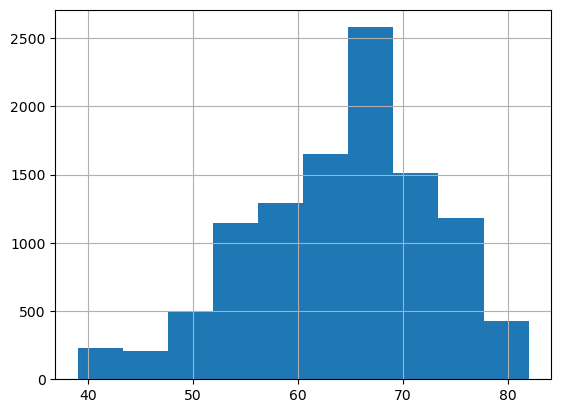

In [23]:
drug_safety[drug_safety['trx'] == 'Drug']['age'].hist();

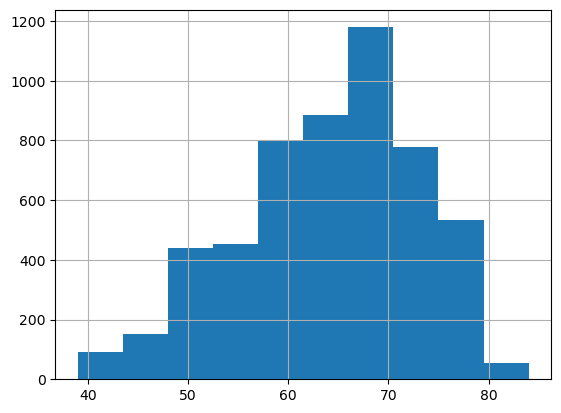

In [24]:
drug_safety[drug_safety['trx'] == 'Placebo'].age.hist();

### 2- Q-Q plot

In [25]:
import statsmodels.api as sm

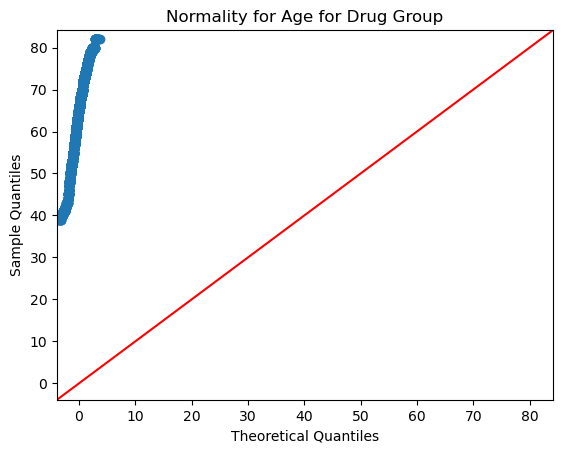

In [26]:
fig = sm.qqplot(drug_safety[drug_safety['trx'] == 'Drug'].age, line = '45')
plt.title('Normality for Age for Drug Group')
plt.show()

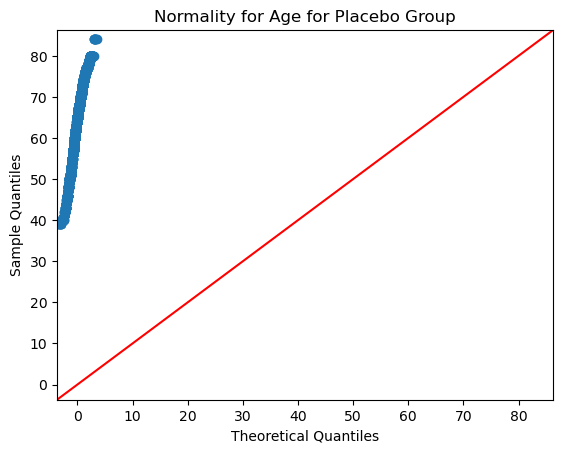

In [27]:
fig = sm.qqplot(drug_safety[drug_safety['trx'] == 'Placebo'].age, line = '45')
plt.title('Normality for Age for Placebo Group')
plt.show()

### 3- Shapiro using scipy

In [28]:
from scipy import stats
shapiro_Drug = stats.shapiro(drug_safety[drug_safety['trx'] == 'Drug'].age)
shapiro_Drug

C:\Users\AHamdan\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9767849445343018, pvalue=2.1891523216101626e-38)

In [29]:
shapiro_Placebo = stats.shapiro(drug_safety[drug_safety['trx'] == 'Placebo'].age)
shapiro_Placebo

ShapiroResult(statistic=0.9755954742431641, pvalue=2.224949827552798e-29)

### 4- Shapiro using pingouin

In [30]:
normality = pingouin.normality(
    data=drug_safety,
    dv='age',
    group='trx',
    method='shapiro', # the default
    alpha=0.05) # 0.05 is also the default

C:\Users\AHamdan\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\AHamdan\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [31]:
normality

,W,pval,normal
trx,,,
Drug,0.976785,2.189152e-38,False
Placebo,0.975595,2.224950e-29,False


## Since data in non-normal we will use Mann Whitney U test

### Get P-Value Using Shapiro

In [32]:
trx_age = drug_safety[['trx','age']]

In [33]:
trx_age_wide = trx_age.pivot(columns = 'trx', values = 'age')
trx_age_wide.head()

trx,Drug,Placebo
0,62.0,NaN
1,62.0,NaN
2,62.0,NaN
3,62.0,NaN
4,62.0,NaN


In [34]:
results = pingouin.mwu(x= trx_age_wide['Drug'] , y= trx_age_wide['Placebo'], alternative = 'two-sided')
results

,U-val,alternative,p-val,RBC,CLES
MWU,29149339.5,two-sided,0.256963,-0.01093,0.505465


In [35]:
age_group_effects_p_value = results['p-val'][0]
age_group_effects_p_value

0.25696267004066287

### Get P-Value using spicy

In [50]:
from scipy import stats
stats.mannwhitneyu( drug_safety[drug_safety['trx'] == 'Drug']['age'],
                    drug_safety[drug_safety['trx'] == 'Placebo']['age'], alternative= 'two-sided')

MannwhitneyuResult(statistic=29149339.5, pvalue=0.25696267004066287)

According to p-value there is no significant difference in age between two groups